<a href="https://colab.research.google.com/github/fahriyegrl/NJIT_RNN_Assignment/blob/main/dl_677_distilbert_based_train_dropout_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [46]:
data_directory = "./pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [47]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [48]:
### Getting Train data
from pathlib import Path

with open(data_directory + "train.txt") as f:
  print(f.readlines()[:20])

['###24293578\n', 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n', 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n', 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n', 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n', 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n', 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-s

In [49]:
## Getting text data
with open(data_directory + "test.txt") as f:
  print(f.readlines()[:20])

['###24845963\n', 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n', 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n', 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n', 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n', "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n", 'RESULTS\

In [50]:

def preprocess_data(data_directory):
  input_lines = open(data_directory).readlines()
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        # line_data["line_number"] = abstract_line_number
        # line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples



In [51]:
data_directory

'./pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [52]:

train_dir = data_directory + "train.txt"
val_dir = data_directory + "dev.txt"
test_dir = data_directory + "test.txt"

train_dir, val_dir, test_dir

('./pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 './pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 './pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')

In [53]:
train_data_all = preprocess_data(train_dir)
print(len(train_data_all))

180040


In [54]:
import pandas as pd

train_data_all = pd.DataFrame(train_data_all)

In [55]:
train_data_all.head()

,target,text
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...
1,METHODS,a total of @ patients with primary knee oa wer...
2,METHODS,outcome measures included pain reduction and i...
3,METHODS,pain was assessed using the visual analog pain...
4,METHODS,secondary outcome measures included the wester...


In [56]:
train_data_all.shape[0]

180040

In [57]:
val_data_all = preprocess_data(val_dir)
val_data_all = pd.DataFrame(val_data_all)

test_data_all = preprocess_data(test_dir)
test_data_all = pd.DataFrame(test_data_all)

len(val_data_all), len(test_data_all)

(30212, 30135)

In [58]:
## Data Visualization - Train-Val-Test Data Size

import plotly.graph_objects as go

fig = go.Figure([go.Pie(labels=['Train Size','Val Size', 'Test Size'], values=[train_data_all.shape[0], val_data_all.shape[0], test_data_all.shape[0]])])
fig.update_layout(title='Train,Validation and Test Size')
fig.show()

In [59]:
## Data Visualization - Percentage of Class

fig = go.Figure([go.Pie(labels=['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'], values=train_data_all.target.value_counts())])
fig.update_layout(title='Percentage of Class (OBJECTIVE, METHODS, RESULTS, CONCLUSIONS, BACKGROUND)')
fig.show()


In [60]:
## changing the train-test-val data to numeric values

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

train_one_hot = one_hot_encoder.fit_transform(train_data_all[["target"]])
val_one_hot = one_hot_encoder.transform(val_data_all[["target"]])
test_one_hot = one_hot_encoder.transform(test_data_all[["target"]])

train_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [61]:
## Label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data_all["target"])
val_labels = label_encoder.transform(val_data_all["target"])
test_labels = label_encoder.transform(test_data_all["target"])

train_labels

array([3, 2, 2, ..., 4, 1, 1])

In [62]:
label_encoder.classes_


array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [63]:
# Epoch 1 | Train Loss: 0.6449 | Train Accuracy: 0.7536
# Epoch 1 | Val Loss: 0.5316 | Val Accuracy: 0.8016
# Epoch 2 | Train Loss: 0.5128 | Train Accuracy: 0.8088
# Epoch 2 | Val Loss: 0.4967 | Val Accuracy: 0.8124
# Epoch 3 | Train Loss: 0.4646 | Train Accuracy: 0.8280
# Epoch 3 | Val Loss: 0.4898 | Val Accuracy: 0.8144
# Epoch 4 | Train Loss: 0.4243 | Train Accuracy: 0.8434
# Epoch 4 | Val Loss: 0.4837 | Val Accuracy: 0.8215
# Epoch 5 | Train Loss: 0.3867 | Train Accuracy: 0.8581
# Epoch 5 | Val Loss: 0.4808 | Val Accuracy: 0.8286

In [64]:
## Transformer for DistilBert model with Dropout

# class TransformerBlockDropout(nn.Module):
#     def __init__(self, hidden_size, num_heads, dropout):
#         super().__init__()
#         self.attention = nn.MultiheadAttention(hidden_size, num_heads, dropout = dropout, batch_first=True)
#         self.norm1 = nn.LayerNorm(hidden_size)
#         self.ffn = nn.Sequential(
#             nn.Linear(hidden_size, hidden_size * 4),
#             nn.GELU(),

#             nn.Linear(hidden_size * 4, hidden_size)
#         )
#         self.norm2 = nn.LayerNorm(hidden_size)

#     def forward(self, x, attn_mask = None):

#         # Reshape padding mask to resolve tossed error.
#         if attn_mask is not None:

#             key_padding_mask = (attn_mask == 0).bool()

#         else:

#             key_padding_mask = None

#         attn_output, _ = self.attention(x, x, x, key_padding_mask = key_padding_mask)
#         x = self.norm1(x + attn_output)
#         ffn_output = self.ffn(x)
#         x = self.norm2(x + ffn_output)
#         return x

In [65]:
class TransformerBlockDropout(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super().__init__()
        self.attention = nn.MultiheadAttention(hidden_size, num_heads, batch_first=True)
        self.norm1 = nn.LayerNorm(hidden_size)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.GELU(),
            nn.Linear(hidden_size * 4, hidden_size)
        )
        self.norm2 = nn.LayerNorm(hidden_size)

    def forward(self, x, attn_mask=None):
        if attn_mask is not None:

            key_padding_mask = (attn_mask == 0).bool()

        else:

            key_padding_mask = None

        attn_output, _ = self.attention(x, x, x, key_padding_mask = key_padding_mask)
        x = self.norm1(x + attn_output)
        ffn_output = self.ffn(x)
        x = self.norm2(x + ffn_output)
        return x


In [66]:
import torch
import torch.nn as nn

class DistilBERTDropout(nn.Module):
    def __init__(self,
                 vocab_size=30522,
                 max_position_embeddings=512,
                 hidden_size=768,
                 num_layers=6,
                 num_heads=12,
                 num_classes=5,
                 dropout_rate=0.3  # <- NEW
                ):
        super().__init__()

        self.embeddings = nn.Embedding(vocab_size, hidden_size)
        self.position_embeddings = nn.Embedding(max_position_embeddings, hidden_size)

        self.transformer_blocks = nn.ModuleList([
            TransformerBlockDropout(hidden_size, num_heads) for _ in range(num_layers)
        ])

        self.dropout = nn.Dropout(dropout_rate)  # <- NEW
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids):
        batch_size, seq_len = input_ids.shape
        positions = torch.arange(0, seq_len, device=input_ids.device).unsqueeze(0)

        x = self.embeddings(input_ids) + self.position_embeddings(positions)

        for layer in self.transformer_blocks:
            x = layer(x)

        cls_token = x[:, 0]  # First token (assumed as [CLS])
        cls_token = self.dropout(cls_token)  # <- Apply dropout before classifier
        return self.classifier(cls_token)


In [67]:
## DistilBert model with dropout.

# import torch
# from torch import nn

# class DistilBERTDropout(nn.Module):
#     def __init__(self,
#                  vocab_size=30522,
#                  max_position_embeddings=512,
#                  hidden_size=768,
#                  num_layers=6,
#                  num_heads=12,
#                  num_classes=5,
#                  dropout = 0.1,
#                  attn_mask = None
#                 ):

#         super().__init__()

#         self.embeddings = nn.Embedding(vocab_size, hidden_size, padding_idx = 0)
#         self.position_embeddings = nn.Embedding(max_position_embeddings, hidden_size)

#         self.transformer_blocks = nn.ModuleList([
#             TransformerBlockDropout(hidden_size, num_heads, dropout) for _ in range(num_layers)
#         ])

#         self.classifier = nn.Linear(hidden_size, num_classes)

#     def forward(self, input_ids, attn_mask = None):
#         batch_size, seq_len = input_ids.shape

#         positions = torch.arange(0, seq_len, device = input_ids.device).unsqueeze(0)

#         x = self.embeddings(input_ids) + self.position_embeddings(positions)

#         for layer in self.transformer_blocks:
#             x = layer(x, attn_mask)

#         cls_token = x[:, 0]  # First token
#         return self.classifier(cls_token)

#     def predict(self, input_ids, attn_mask=None):

#         # Set model to evaluate.
#         self.eval()

#         # Make sure gradients aren't altered.
#         with torch.no_grad():

#             # Assumes batched input.
#             batch_size, seq_len = input_ids.shape

#             # Get embeddings.
#             positions = torch.arange(0, seq_len, device=input_ids.device).unsqueeze(0)
#             positions = positions.expand(batch_size, seq_len)

#             # Concat embeddings.
#             x = self.embeddings(input_ids) + self.position_embeddings(positions)

#             # Send through transformer.
#             for layer in self.transformer_blocks:
#                 x = layer(x, attn_mask)

#             # Get tokenized logits.
#             cls_token = x[:, 0]

#             # Convert to logits.
#             logits = self.classifier(cls_token)

#             # Get class prediction.
#             predicted_labels = torch.argmax(logits, dim=1)

#             # Return prediction.
#             return predicted_labels



In [68]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

In [69]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        text = item['text']
        text = str(text)

        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        # Encode Label
        label = item['target']
        label = label_encoder.transform([label])[0]
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 3. Dataloaders
train_dataset = TextDataset(train_data_all, tokenizer)
val_dataset = TextDataset(val_data_all, tokenizer)
test_dataset = TextDataset(test_data_all, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [70]:
train_dataset[:1]

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'input_ids': tensor([  101,  1014,  2000,  8556,  1996, 21150,  1997,  1030,  3134,  1997,
         26181,  1012,  1012,  1012,  2171,  1024,  3793,  1010, 26718, 18863,
          1024,  4874,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [71]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def evaluate(model, dataloader, loss_fn, device):
    model.eval()
    all_preds = []
    all_labels = []
    losses = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids)
            loss = loss_fn(outputs, labels)
            losses.append(loss.item())

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    avg_loss = np.mean(losses)
    return avg_loss, acc


def train(model, train_loader, val_loader, loss_fn, optimizer, device, epochs=5):
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    for epoch in range(epochs):
        model.train()
        train_losses = []
        train_preds = []
        train_labels = []

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            preds = torch.argmax(outputs, dim=1)
            train_preds.extend(preds.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        train_acc = accuracy_score(train_labels, train_preds)
        avg_train_loss = np.mean(train_losses)

        val_loss, val_acc = evaluate(model, val_loader, loss_fn, device)

        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
        print(f"Epoch {epoch+1} | Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    return history

In [72]:
# plt.figure(figsize=(12, 5))

# # Loss
# plt.subplot(1, 2, 1)
# plt.plot(history_base['train_loss'], label='Train Loss', marker='o')
# plt.plot(history_base['val_loss'], label='Val Loss', marker='o')
# plt.title('Loss over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Accuracy
# plt.subplot(1, 2, 2)
# plt.plot(history_base['train_acc'], label='Train Accuracy', marker='o')
# plt.plot(history_base['val_acc'], label='Val Accuracy', marker='o')
# plt.title('Accuracy over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()



In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [74]:
model_droput = DistilBERTDropout(num_classes=5).to(device)

In [75]:

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model_droput.parameters(), lr=5e-5)

In [76]:
history_droput = train(model_droput, train_loader, val_loader,loss_fn,optimizer,device, epochs=5)

Epoch 1 | Train Loss: 0.6372 | Train Accuracy: 0.7589
Epoch 1 | Val Loss: 0.5109 | Val Accuracy: 0.8133
Epoch 2 | Train Loss: 0.4975 | Train Accuracy: 0.8170
Epoch 2 | Val Loss: 0.4999 | Val Accuracy: 0.8090
Epoch 3 | Train Loss: 0.4397 | Train Accuracy: 0.8369
Epoch 3 | Val Loss: 0.4839 | Val Accuracy: 0.8221
Epoch 4 | Train Loss: 0.3902 | Train Accuracy: 0.8558
Epoch 4 | Val Loss: 0.4955 | Val Accuracy: 0.8232
Epoch 5 | Train Loss: 0.3429 | Train Accuracy: 0.8738
Epoch 5 | Val Loss: 0.4880 | Val Accuracy: 0.8256


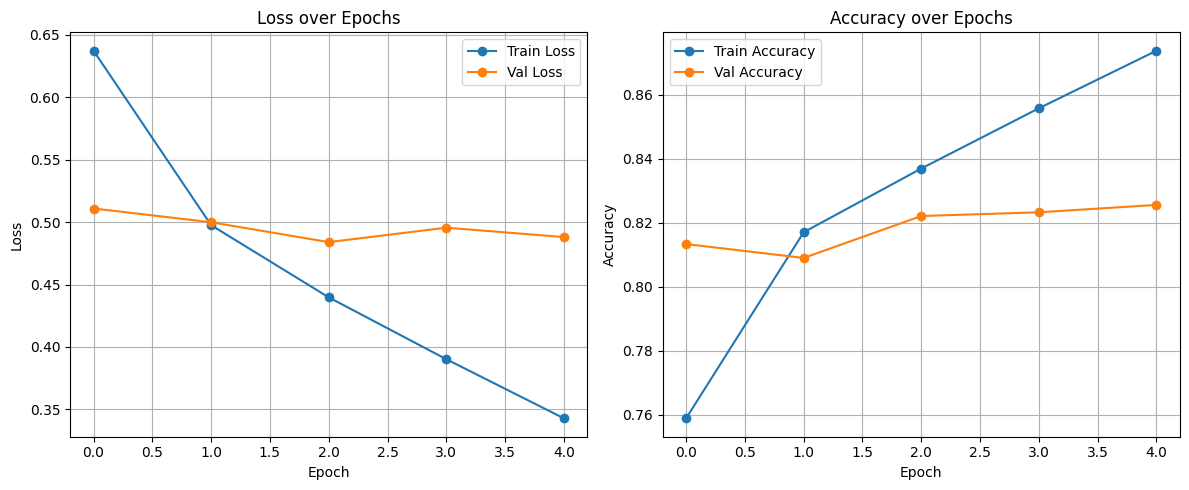

In [81]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_droput['train_loss'], label='Train Loss', marker='o')
plt.plot(history_droput['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_droput['train_acc'], label='Train Accuracy', marker='o')
plt.plot(history_droput['val_acc'], label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [78]:
train_data_all[:1]

,target,text
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...


In [79]:
test_data_all[:1]

,target,text
0,BACKGROUND,this study analyzed liver function abnormaliti...


In [80]:
train_data_all = pd.DataFrame(train_data_all)